# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading dataset
titanic = pd.read_csv("./titanic_data/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


the info above show that some passengers are missing their ages. Some don't have their ports registerred, and most of them don't have a cabin. 

In [4]:
survived = titanic[titanic["Survived"] == 1]
survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  342 non-null    int64  
 1   Survived     342 non-null    int64  
 2   Pclass       342 non-null    int64  
 3   Name         342 non-null    object 
 4   Sex          342 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        342 non-null    int64  
 7   Parch        342 non-null    int64  
 8   Ticket       342 non-null    object 
 9   Fare         342 non-null    float64
 10  Cabin        136 non-null    object 
 11  Embarked     340 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB


In [5]:
dead = titanic[titanic["Survived"] == 0]
dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived     549 non-null    int64  
 2   Pclass       549 non-null    int64  
 3   Name         549 non-null    object 
 4   Sex          549 non-null    object 
 5   Age          424 non-null    float64
 6   SibSp        549 non-null    int64  
 7   Parch        549 non-null    int64  
 8   Ticket       549 non-null    object 
 9   Fare         549 non-null    float64
 10  Cabin        68 non-null     object 
 11  Embarked     549 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 55.8+ KB


In [6]:
print("survived/dead: ", len(survived)/len(dead))
print("male/female: ", (titanic["Sex"] == "male").sum()/(titanic["Sex"] == "female").sum())
print("male survived/dead: ", (survived["Sex"] == "male").sum()/(dead["Sex"] == "male").sum())
print("female survived/dead: ", (survived["Sex"] == "female").sum()/(dead["Sex"] == "female").sum())

survived/dead:  0.6229508196721312
male/female:  1.8375796178343948
male survived/dead:  0.2329059829059829
female survived/dead:  2.876543209876543


There are actually more males than females but more females survived the wreck as compared to the males.
Sex is a key factor.

#### Exploring the ticket class

In [7]:
print("num of first class ticket holders that survived: ", (survived["Pclass"] == 1).sum())
print("num of second class ticket holders that survived: ", (survived["Pclass"] == 2).sum())
print("num of third class ticket holders that survived: ", (survived["Pclass"] == 3).sum())

num of first class ticket holders that survived:  136
num of second class ticket holders that survived:  87
num of third class ticket holders that survived:  119


<AxesSubplot: >

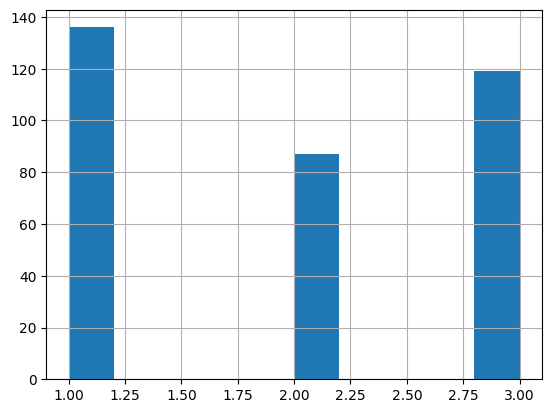

In [8]:
survived["Pclass"].hist()

<AxesSubplot: >

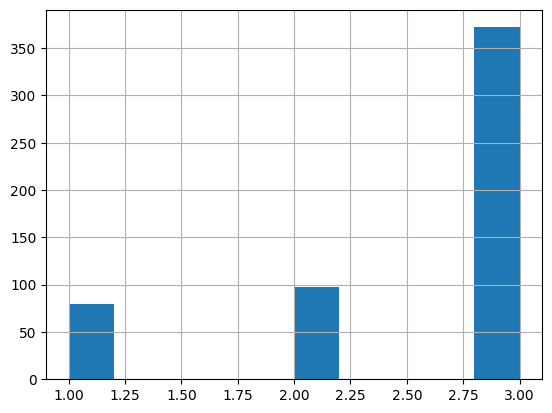

In [9]:
dead["Pclass"].hist()

In [10]:
print("First class survived/dead: ", (survived["Pclass"] == 1).sum()/(dead["Pclass"] == 1).sum())
print("Second Class survived/dead: ", (survived["Pclass"] == 2).sum()/(dead["Pclass"] == 2).sum())
print("Third Class survived/dead: ", (survived["Pclass"] == 3).sum()/(dead["Pclass"] == 3).sum())

First class survived/dead:  1.7
Second Class survived/dead:  0.8969072164948454
Third Class survived/dead:  0.31989247311827956


- Most of the first class people survived. More than half
- A little less than half of the second class people survived
- Very few of the third class people survived.

Most likely has something to do with how they are arranged in the ship and the amount of priority given to them

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Exploring the age

In [13]:
print("avg age of the people who survived: ", survived["Age"].mean())
print("avg age of the people who died: ", dead["Age"].mean())

avg age of the people who survived:  28.343689655172415
avg age of the people who died:  30.62617924528302


<AxesSubplot: >

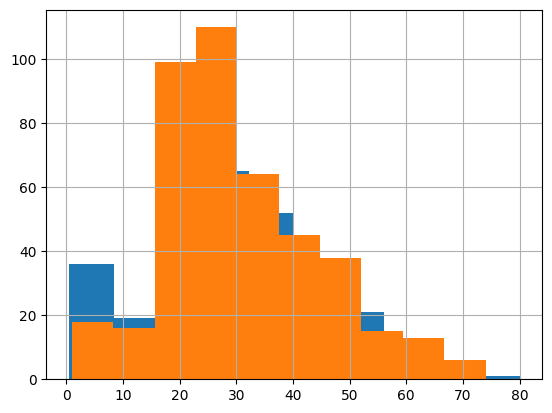

In [14]:
survived["Age"].hist()
dead["Age"].hist()

Age of both sides seems to be evenly distributed. 

Age doesn't seem as an important feature.

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Exploring the fare

In [17]:
print("avg fare of the people who survived: ", survived["Fare"].mean())
print("avg fare of the people who died: ", dead["Fare"].mean())

avg fare of the people who survived:  48.39540760233918
avg fare of the people who died:  22.117886885245902


<AxesSubplot: >

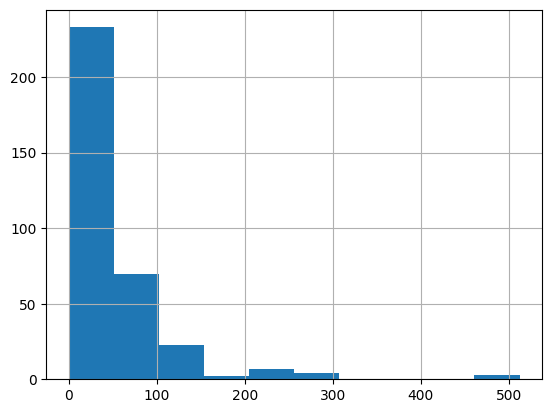

In [18]:
survived["Fare"].hist()

<AxesSubplot: >

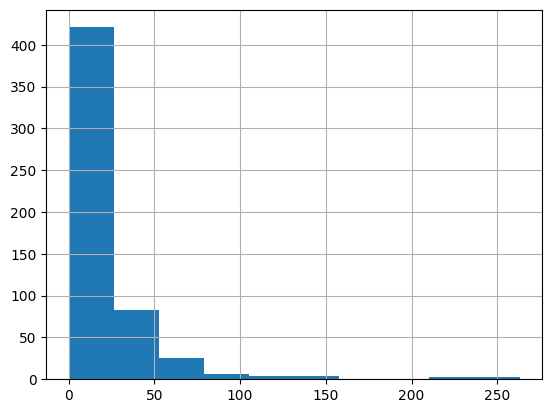

In [19]:
dead["Fare"].hist()

Seems like those who paid more fare ended up surviviing and this probably has to do with the ticket class

#### Exploring Embarked

where they took the ship from

<AxesSubplot: >

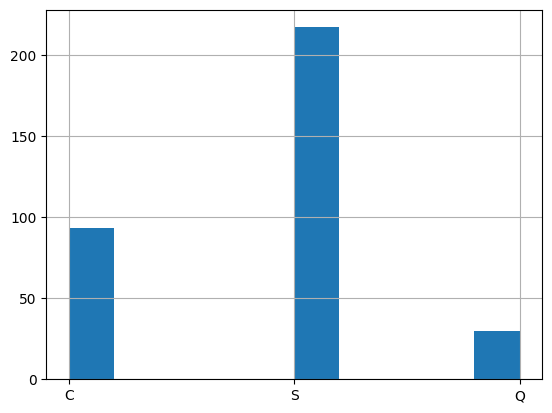

In [20]:
survived["Embarked"].hist()

<AxesSubplot: >

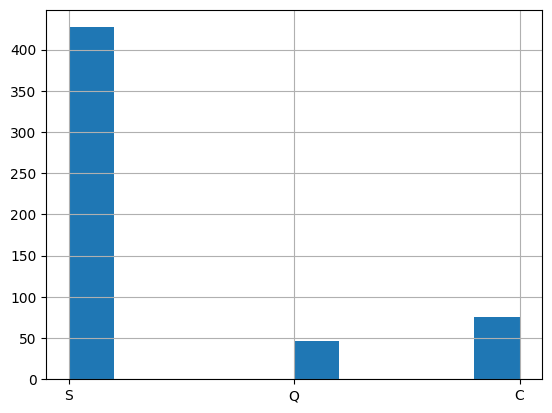

In [21]:
dead["Embarked"].hist()

In [22]:
pd.DataFrame(survived["Embarked"].value_counts())/len(survived)

,Embarked
S,0.634503
C,0.271930
Q,0.087719


In [23]:
pd.DataFrame(dead["Embarked"].value_counts())/len(dead)

,Embarked
S,0.777778
C,0.136612
Q,0.085610


In [24]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
titanic['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

#### Exploring SibSp

<AxesSubplot: >

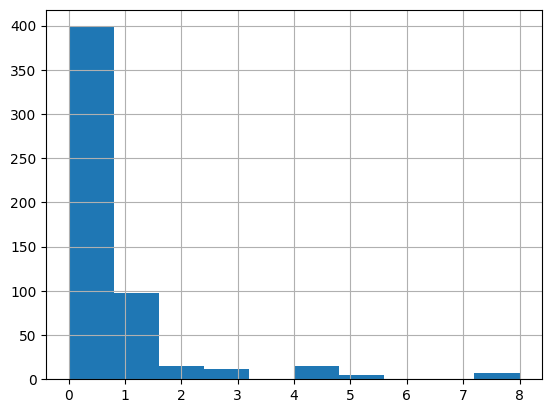

In [26]:
dead["SibSp"].hist()

<AxesSubplot: >

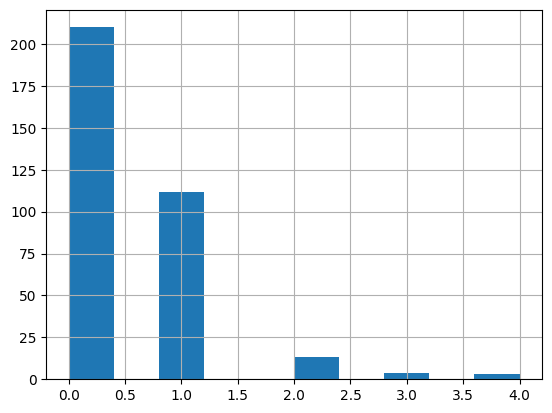

In [27]:
survived["SibSp"].hist()

based on the distribution, there are variations. means the SipSb is a factor to consider when predicting whether someone has survived or not

<AxesSubplot: >

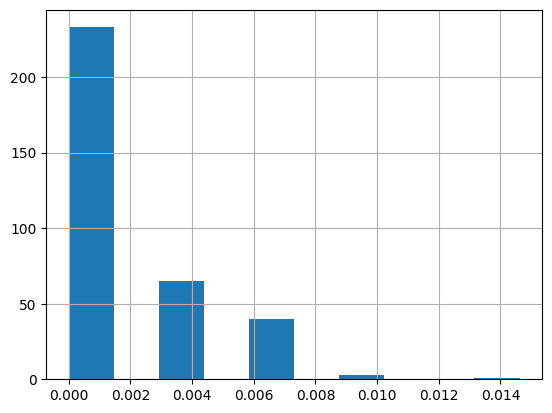

In [31]:
(survived["Parch"]/len(survived)).hist()

<AxesSubplot: >

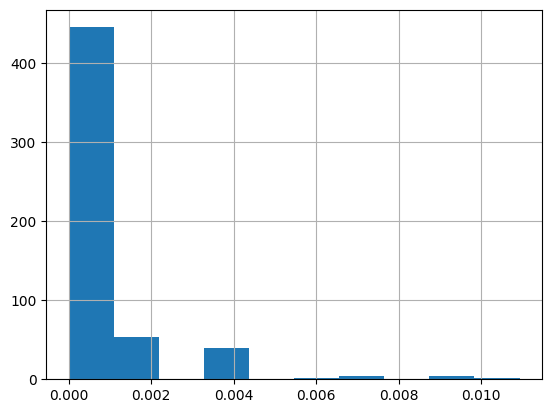

In [32]:
(dead["Parch"]/len(dead)).hist()

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
def even_odd(array):
    even = 0
    odd = 0
    for number in array:
        if number % 2 == 0:
            even += 1
        else:
            odd += 1
    
    return even, odd

In [43]:
even_odd(np.array(survived["PassengerId"]))

(184, 158)

In [44]:
even_odd(np.array(dead["PassengerId"]))

(261, 288)

In [45]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
